In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [39]:
time = pd.read_csv("./data/csv_time.txt", names=["method_name","classifier","number_of_nodes", "train_edges","test_edges", "classifier_training_time", "method_time"])
time = time.drop(['train_edges', 'test_edges', 'classifier_training_time'], axis=1)
time


,method_name,classifier,number_of_nodes,method_time
0,nodevec (32),SVM,5783,16.9564
1,node2vec (16),SVM,5783,17.7308
2,node2vec+UMAP (16),SVM,5783,31.5087
3,node2vec+PCA (16),SVM,5783,0.0173
4,nodevec (32),LR,5783,16.5669
5,node2vec (16),LR,5783,17.5029
6,node2vec+UMAP (16),LR,5783,30.6835
7,node2vec+PCA (16),LR,5783,0.0156
8,nodevec (32),SVM,2299,5.9667
9,node2vec (16),SVM,2299,6.0135


In [76]:
fig, ax = plt.subplots(figsize=(15,7))

group_by = time.groupby(['method_name', 'classifier'])['method_time']

for name,group in group_by:
    print (name, group)

('node2vec (16)', 'LR') 5     17.5029
13     6.1549
21     2.8761
Name: method_time, dtype: float64
('node2vec (16)', 'SVM') 1     17.7308
9      6.0135
17     2.9588
Name: method_time, dtype: float64
('node2vec+PCA (16)', 'LR') 7     0.0156
15    0.0103
23    0.0088
Name: method_time, dtype: float64
('node2vec+PCA (16)', 'SVM') 3     0.0173
11    0.0111
19    0.0085
Name: method_time, dtype: float64
('node2vec+UMAP (16)', 'LR') 6     30.6835
14    20.9363
22    10.1956
Name: method_time, dtype: float64
('node2vec+UMAP (16)', 'SVM') 2     31.5087
10    20.7935
18    10.1158
Name: method_time, dtype: float64
('nodevec (32)', 'LR') 4     16.5669
12     5.8150
20     2.6772
Name: method_time, dtype: float64
('nodevec (32)', 'SVM') 0     16.9564
8      5.9667
16     2.7698
Name: method_time, dtype: float64


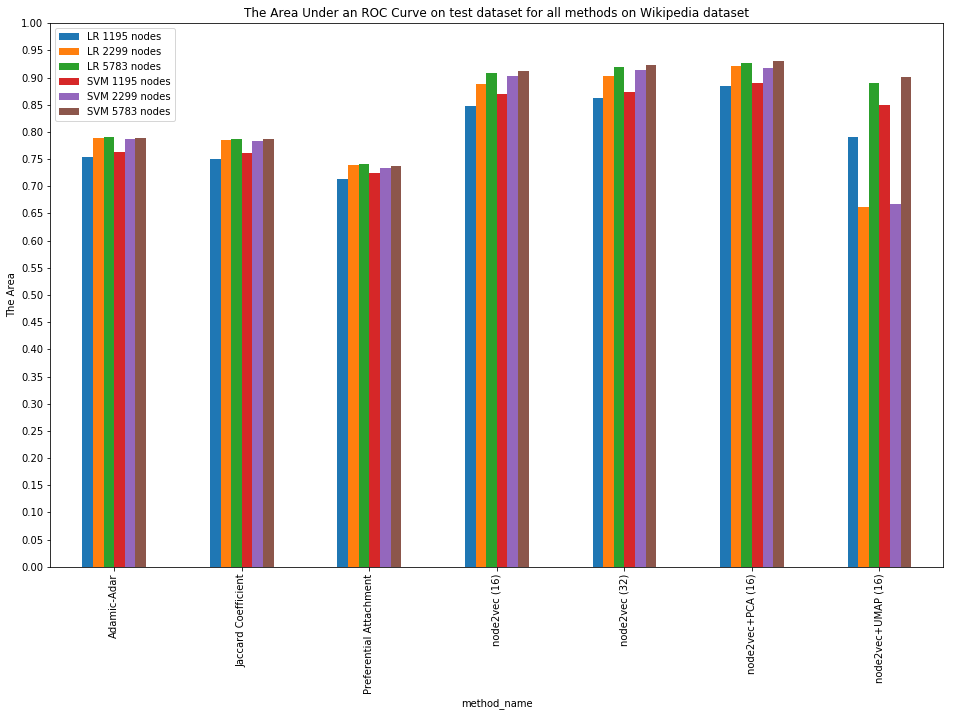

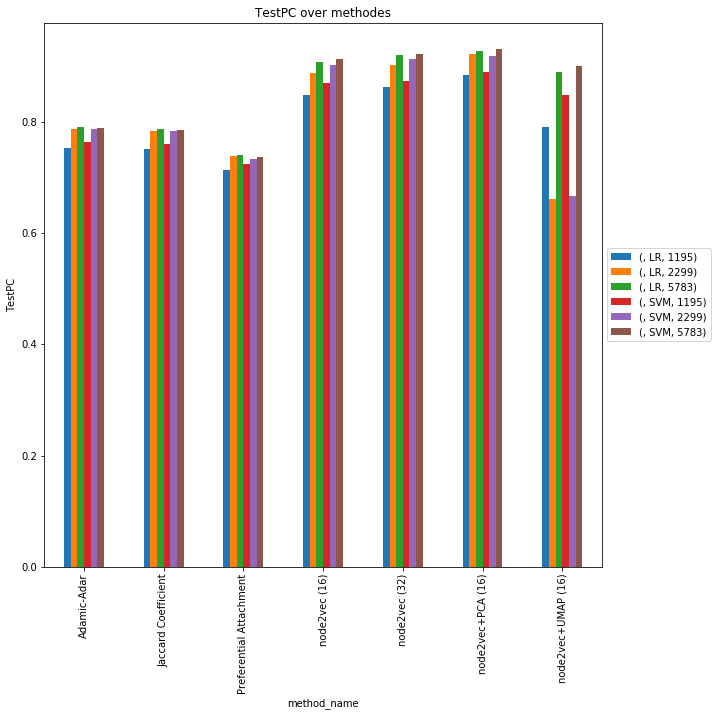

In [36]:
df = pd.read_csv("./data/csv_results.txt", names=["method_name","classifier","number_of_nodes", "train_edges","test_edges", "testROC", "testPC"])
df = df.drop(['train_edges', 'test_edges'], axis=1)
blankIndex=[''] * len(df)
df.index=blankIndex
df

df_roc = df.groupby(['classifier','number_of_nodes','method_name']).apply(lambda _df: _df.testROC).unstack(0).unstack(0)
df_pc = df.groupby(['classifier','number_of_nodes','method_name']).apply(lambda _df: _df.testPC).unstack(0).unstack(0)

f = plt.figure(figsize=(16,10))
plt.title('The Area Under an ROC Curve on test dataset for all methods on Wikipedia dataset', color='black')
plt.ylabel('The Area')
plt.xlabel('Method name')
df_roc.plot(kind='bar', ax=f.gca())
plt.legend(["LR 1195 nodes", "LR 2299 nodes", "LR 5783 nodes", "SVM 1195 nodes", "SVM 2299 nodes", "SVM 5783 nodes"], loc='upper left')
plt.yticks(np.arange(0, 1.05, step=0.05))
plt.show()

f = plt.figure(figsize=(16,10))
plt.title('The Area Under an ROC Curve on test dataset for all methods on Wikipedia dataset', color='black')
plt.ylabel('TestPC')
plt.xlabel('Methode name')
df_roc.plot(kind='bar', ax=f.gca())
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()